## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import bostonDataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 13
n_samples= 506
n_target = 1 

In [6]:
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X_train,Y_train)

Learning rate set to 0.033215
0:	learn: 0.9989982	total: 56.8ms	remaining: 56.8s
1:	learn: 0.9781196	total: 57.9ms	remaining: 28.9s
2:	learn: 0.9561419	total: 58.9ms	remaining: 19.6s
3:	learn: 0.9382219	total: 59.8ms	remaining: 14.9s
4:	learn: 0.9201172	total: 60.7ms	remaining: 12.1s
5:	learn: 0.9057260	total: 61.6ms	remaining: 10.2s
6:	learn: 0.8896506	total: 62.7ms	remaining: 8.89s
7:	learn: 0.8730441	total: 63.7ms	remaining: 7.9s
8:	learn: 0.8576261	total: 64.7ms	remaining: 7.13s
9:	learn: 0.8418604	total: 65.7ms	remaining: 6.5s
10:	learn: 0.8270822	total: 66.7ms	remaining: 5.99s
11:	learn: 0.8118281	total: 67.5ms	remaining: 5.55s
12:	learn: 0.7962290	total: 68.4ms	remaining: 5.19s
13:	learn: 0.7812009	total: 69.2ms	remaining: 4.87s
14:	learn: 0.7680345	total: 69.9ms	remaining: 4.59s
15:	learn: 0.7550693	total: 70.8ms	remaining: 4.35s
16:	learn: 0.7431282	total: 71.7ms	remaining: 4.14s
17:	learn: 0.7297526	total: 72.5ms	remaining: 3.96s
18:	learn: 0.7167876	total: 73.3ms	remaining: 

57:	learn: 0.4258277	total: 109ms	remaining: 1.77s
58:	learn: 0.4208567	total: 110ms	remaining: 1.76s
59:	learn: 0.4168503	total: 111ms	remaining: 1.74s
60:	learn: 0.4128138	total: 112ms	remaining: 1.72s
61:	learn: 0.4080581	total: 113ms	remaining: 1.71s
62:	learn: 0.4052332	total: 114ms	remaining: 1.69s
63:	learn: 0.4014038	total: 115ms	remaining: 1.68s
64:	learn: 0.3981660	total: 116ms	remaining: 1.66s
65:	learn: 0.3947449	total: 117ms	remaining: 1.65s
66:	learn: 0.3912741	total: 118ms	remaining: 1.64s
67:	learn: 0.3873391	total: 118ms	remaining: 1.62s
68:	learn: 0.3842065	total: 119ms	remaining: 1.61s
69:	learn: 0.3817284	total: 120ms	remaining: 1.59s
70:	learn: 0.3778260	total: 121ms	remaining: 1.58s
71:	learn: 0.3734080	total: 122ms	remaining: 1.57s
72:	learn: 0.3708208	total: 123ms	remaining: 1.56s
73:	learn: 0.3671536	total: 124ms	remaining: 1.55s
74:	learn: 0.3643549	total: 125ms	remaining: 1.53s
75:	learn: 0.3617514	total: 125ms	remaining: 1.52s
76:	learn: 0.3582149	total: 126

151:	learn: 0.2526417	total: 193ms	remaining: 1.07s
152:	learn: 0.2518300	total: 194ms	remaining: 1.07s
153:	learn: 0.2512676	total: 195ms	remaining: 1.07s
154:	learn: 0.2504188	total: 195ms	remaining: 1.06s
155:	learn: 0.2496917	total: 196ms	remaining: 1.06s
156:	learn: 0.2486128	total: 197ms	remaining: 1.06s
157:	learn: 0.2479242	total: 198ms	remaining: 1.05s
158:	learn: 0.2471378	total: 199ms	remaining: 1.05s
159:	learn: 0.2465246	total: 200ms	remaining: 1.05s
160:	learn: 0.2455050	total: 200ms	remaining: 1.04s
161:	learn: 0.2448197	total: 201ms	remaining: 1.04s
162:	learn: 0.2442333	total: 202ms	remaining: 1.04s
163:	learn: 0.2434853	total: 203ms	remaining: 1.03s
164:	learn: 0.2426636	total: 204ms	remaining: 1.03s
165:	learn: 0.2420179	total: 205ms	remaining: 1.03s
166:	learn: 0.2415394	total: 205ms	remaining: 1.02s
167:	learn: 0.2410567	total: 206ms	remaining: 1.02s
168:	learn: 0.2402442	total: 207ms	remaining: 1.02s
169:	learn: 0.2393721	total: 208ms	remaining: 1.01s
170:	learn: 

275:	learn: 0.1843897	total: 301ms	remaining: 789ms
276:	learn: 0.1839653	total: 302ms	remaining: 787ms
277:	learn: 0.1832161	total: 302ms	remaining: 786ms
278:	learn: 0.1827311	total: 303ms	remaining: 784ms
279:	learn: 0.1820954	total: 304ms	remaining: 783ms
280:	learn: 0.1817543	total: 305ms	remaining: 781ms
281:	learn: 0.1813965	total: 306ms	remaining: 779ms
282:	learn: 0.1808420	total: 307ms	remaining: 778ms
283:	learn: 0.1804217	total: 308ms	remaining: 776ms
284:	learn: 0.1800554	total: 309ms	remaining: 775ms
285:	learn: 0.1797353	total: 310ms	remaining: 773ms
286:	learn: 0.1792750	total: 311ms	remaining: 771ms
287:	learn: 0.1789285	total: 311ms	remaining: 770ms
288:	learn: 0.1785570	total: 312ms	remaining: 768ms
289:	learn: 0.1780834	total: 313ms	remaining: 767ms
290:	learn: 0.1776992	total: 314ms	remaining: 765ms
291:	learn: 0.1772828	total: 315ms	remaining: 764ms
292:	learn: 0.1770867	total: 316ms	remaining: 762ms
293:	learn: 0.1768950	total: 317ms	remaining: 761ms
294:	learn: 

368:	learn: 0.1520417	total: 384ms	remaining: 656ms
369:	learn: 0.1517485	total: 385ms	remaining: 655ms
370:	learn: 0.1515472	total: 385ms	remaining: 654ms
371:	learn: 0.1512588	total: 386ms	remaining: 652ms
372:	learn: 0.1509729	total: 387ms	remaining: 651ms
373:	learn: 0.1507614	total: 388ms	remaining: 649ms
374:	learn: 0.1505843	total: 389ms	remaining: 648ms
375:	learn: 0.1504778	total: 390ms	remaining: 647ms
376:	learn: 0.1501474	total: 390ms	remaining: 645ms
377:	learn: 0.1497634	total: 391ms	remaining: 644ms
378:	learn: 0.1494318	total: 392ms	remaining: 642ms
379:	learn: 0.1490924	total: 393ms	remaining: 641ms
380:	learn: 0.1486440	total: 394ms	remaining: 640ms
381:	learn: 0.1484185	total: 394ms	remaining: 638ms
382:	learn: 0.1479814	total: 395ms	remaining: 637ms
383:	learn: 0.1476759	total: 396ms	remaining: 636ms
384:	learn: 0.1474804	total: 397ms	remaining: 634ms
385:	learn: 0.1470735	total: 398ms	remaining: 633ms
386:	learn: 0.1466425	total: 399ms	remaining: 632ms
387:	learn: 

489:	learn: 0.1205791	total: 492ms	remaining: 512ms
490:	learn: 0.1205020	total: 493ms	remaining: 511ms
491:	learn: 0.1202573	total: 494ms	remaining: 510ms
492:	learn: 0.1199726	total: 495ms	remaining: 509ms
493:	learn: 0.1198668	total: 495ms	remaining: 508ms
494:	learn: 0.1196447	total: 496ms	remaining: 506ms
495:	learn: 0.1194556	total: 497ms	remaining: 505ms
496:	learn: 0.1193200	total: 498ms	remaining: 504ms
497:	learn: 0.1191354	total: 499ms	remaining: 503ms
498:	learn: 0.1189491	total: 500ms	remaining: 502ms
499:	learn: 0.1187115	total: 501ms	remaining: 501ms
500:	learn: 0.1184310	total: 502ms	remaining: 500ms
501:	learn: 0.1181879	total: 502ms	remaining: 498ms
502:	learn: 0.1181296	total: 503ms	remaining: 497ms
503:	learn: 0.1178424	total: 504ms	remaining: 496ms
504:	learn: 0.1175163	total: 506ms	remaining: 496ms
505:	learn: 0.1174413	total: 506ms	remaining: 494ms
506:	learn: 0.1172945	total: 507ms	remaining: 493ms
507:	learn: 0.1170318	total: 508ms	remaining: 492ms
508:	learn: 

585:	learn: 0.1032388	total: 575ms	remaining: 406ms
586:	learn: 0.1029453	total: 576ms	remaining: 405ms
587:	learn: 0.1027510	total: 577ms	remaining: 404ms
588:	learn: 0.1024732	total: 577ms	remaining: 403ms
589:	learn: 0.1023013	total: 578ms	remaining: 402ms
590:	learn: 0.1021952	total: 579ms	remaining: 401ms
591:	learn: 0.1021304	total: 580ms	remaining: 400ms
592:	learn: 0.1018935	total: 581ms	remaining: 399ms
593:	learn: 0.1017798	total: 582ms	remaining: 398ms
594:	learn: 0.1015383	total: 582ms	remaining: 396ms
595:	learn: 0.1014134	total: 583ms	remaining: 395ms
596:	learn: 0.1012306	total: 584ms	remaining: 394ms
597:	learn: 0.1011174	total: 585ms	remaining: 393ms
598:	learn: 0.1009779	total: 586ms	remaining: 392ms
599:	learn: 0.1008959	total: 587ms	remaining: 391ms
600:	learn: 0.1008218	total: 588ms	remaining: 390ms
601:	learn: 0.1006726	total: 589ms	remaining: 389ms
602:	learn: 0.1005439	total: 589ms	remaining: 388ms
603:	learn: 0.1004487	total: 590ms	remaining: 387ms
604:	learn: 

710:	learn: 0.0868740	total: 683ms	remaining: 278ms
711:	learn: 0.0867063	total: 684ms	remaining: 277ms
712:	learn: 0.0864977	total: 685ms	remaining: 276ms
713:	learn: 0.0864754	total: 686ms	remaining: 275ms
714:	learn: 0.0863286	total: 687ms	remaining: 274ms
715:	learn: 0.0862565	total: 688ms	remaining: 273ms
716:	learn: 0.0861798	total: 689ms	remaining: 272ms
717:	learn: 0.0860818	total: 690ms	remaining: 271ms
718:	learn: 0.0859420	total: 691ms	remaining: 270ms
719:	learn: 0.0858240	total: 691ms	remaining: 269ms
720:	learn: 0.0856267	total: 692ms	remaining: 268ms
721:	learn: 0.0855020	total: 693ms	remaining: 267ms
722:	learn: 0.0854664	total: 694ms	remaining: 266ms
723:	learn: 0.0854013	total: 695ms	remaining: 265ms
724:	learn: 0.0853020	total: 696ms	remaining: 264ms
725:	learn: 0.0852809	total: 697ms	remaining: 263ms
726:	learn: 0.0851416	total: 697ms	remaining: 262ms
727:	learn: 0.0850555	total: 698ms	remaining: 261ms
728:	learn: 0.0849445	total: 699ms	remaining: 260ms
729:	learn: 

804:	learn: 0.0770085	total: 765ms	remaining: 185ms
805:	learn: 0.0769895	total: 767ms	remaining: 185ms
806:	learn: 0.0768137	total: 768ms	remaining: 184ms
807:	learn: 0.0767044	total: 768ms	remaining: 183ms
808:	learn: 0.0765133	total: 769ms	remaining: 182ms
809:	learn: 0.0764312	total: 770ms	remaining: 181ms
810:	learn: 0.0763894	total: 771ms	remaining: 180ms
811:	learn: 0.0763087	total: 772ms	remaining: 179ms
812:	learn: 0.0761259	total: 773ms	remaining: 178ms
813:	learn: 0.0760533	total: 774ms	remaining: 177ms
814:	learn: 0.0758500	total: 775ms	remaining: 176ms
815:	learn: 0.0758289	total: 776ms	remaining: 175ms
816:	learn: 0.0757776	total: 776ms	remaining: 174ms
817:	learn: 0.0757022	total: 777ms	remaining: 173ms
818:	learn: 0.0756082	total: 778ms	remaining: 172ms
819:	learn: 0.0755159	total: 779ms	remaining: 171ms
820:	learn: 0.0753459	total: 780ms	remaining: 170ms
821:	learn: 0.0752432	total: 781ms	remaining: 169ms
822:	learn: 0.0751552	total: 782ms	remaining: 168ms
823:	learn: 

929:	learn: 0.0660069	total: 874ms	remaining: 65.8ms
930:	learn: 0.0659299	total: 875ms	remaining: 64.9ms
931:	learn: 0.0658326	total: 876ms	remaining: 63.9ms
932:	learn: 0.0656750	total: 877ms	remaining: 63ms
933:	learn: 0.0655861	total: 878ms	remaining: 62ms
934:	learn: 0.0654358	total: 879ms	remaining: 61.1ms
935:	learn: 0.0653721	total: 880ms	remaining: 60.1ms
936:	learn: 0.0652478	total: 880ms	remaining: 59.2ms
937:	learn: 0.0651631	total: 881ms	remaining: 58.2ms
938:	learn: 0.0650893	total: 882ms	remaining: 57.3ms
939:	learn: 0.0649892	total: 883ms	remaining: 56.3ms
940:	learn: 0.0649181	total: 884ms	remaining: 55.4ms
941:	learn: 0.0648988	total: 885ms	remaining: 54.5ms
942:	learn: 0.0648900	total: 885ms	remaining: 53.5ms
943:	learn: 0.0646872	total: 886ms	remaining: 52.6ms
944:	learn: 0.0645518	total: 887ms	remaining: 51.6ms
945:	learn: 0.0644753	total: 888ms	remaining: 50.7ms
946:	learn: 0.0643510	total: 889ms	remaining: 49.8ms
947:	learn: 0.0642653	total: 890ms	remaining: 48.8

In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

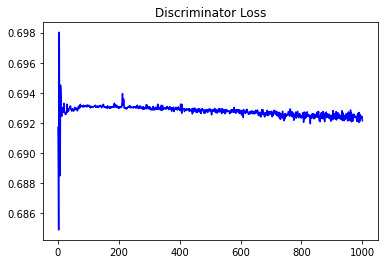

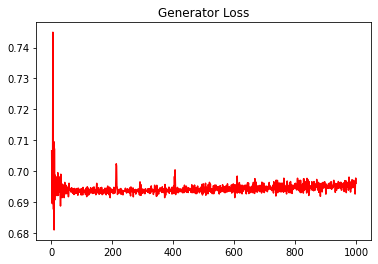

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.08325733417541112


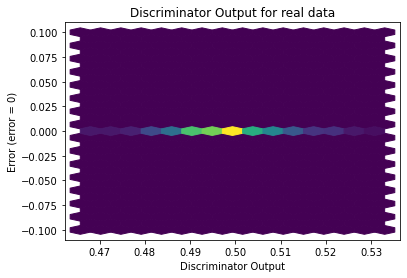

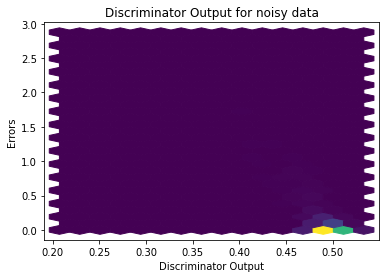

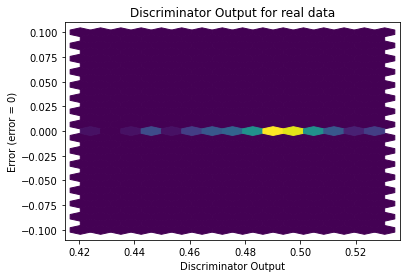

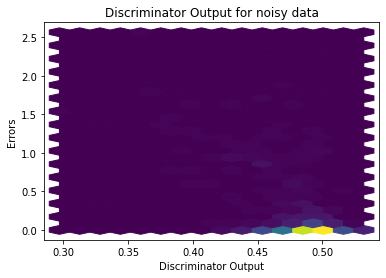

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


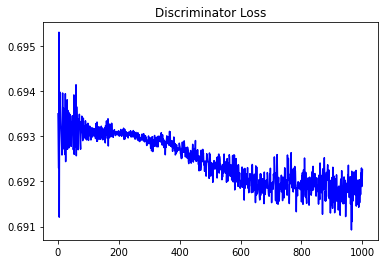

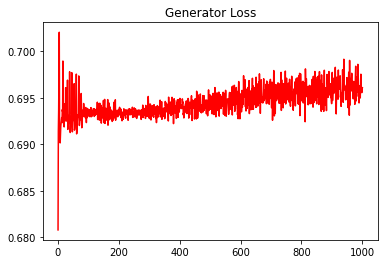

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.08802601440584369


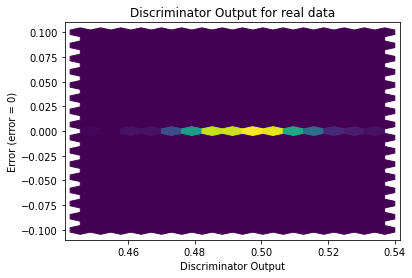

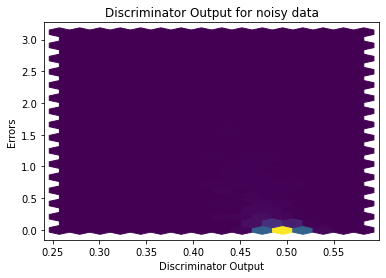

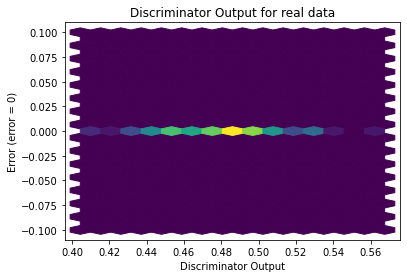

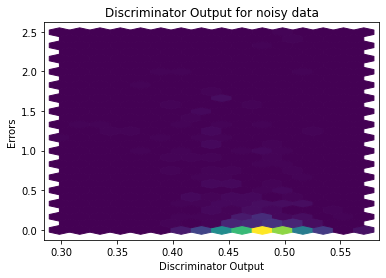

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.2942]], requires_grad=True)
